<a href="https://colab.research.google.com/github/CJ-Kaufman/INDE577_2024/blob/main/Perceptron_Penguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# Load the Palmer Penguins dataset
penguins = sns.load_dataset("penguins")

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
penguins.species.unique() #identify unique penguin species in data

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
chinstrap_gentoo = penguins.query("species=='Chinstrap' or species=='Gentoo'") #make a new list only including rows with chinstrap or gentoo species
chinstrap_gentoo #show

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,Female
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,Male
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,Male
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,Female
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,Male
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
measurements = chinstrap_gentoo[["species", "flipper_length_mm", "bill_depth_mm"]] #make a new list with only the 2 chosen measurements
measurements

,species,flipper_length_mm,bill_depth_mm
152,Chinstrap,192.0,17.9
153,Chinstrap,196.0,19.5
154,Chinstrap,193.0,19.2
155,Chinstrap,188.0,18.7
156,Chinstrap,197.0,19.8
...,...,...,...
339,Gentoo,NaN,NaN
340,Gentoo,215.0,14.3
341,Gentoo,222.0,15.7
342,Gentoo,212.0,14.8


In [ ]:
#Assign numerical mapping to the 2 species chosen, make a new list of species with numerical identifiers
label_mapping = {'Chinstrap':1, 'Gentoo':-1}
y = np.array([label_mapping[species] for species in measurements['species']])
print(y)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
#Make a list of coordintes for a graph based on the 2 chosen measurements

# Assuming X is already defined as follows:
X_dirty = measurements[["flipper_length_mm", "bill_depth_mm"]].to_numpy()

# Create a mask for non-NaN values in X
mask = ~np.isnan(X_dirty).any(axis=1)

# Create a new array without NaN values
X = X_dirty[mask]

#also clean y values so the arrays match in size
y = y[mask]

# Now X_clean contains only the rows without NaN values
print("Cleaned array without NaNs:")
print(X)

Cleaned array without NaNs:
[[192.   17.9]
 [196.   19.5]
 [193.   19.2]
 [188.   18.7]
 [197.   19.8]
 [198.   17.8]
 [178.   18.2]
 [197.   18.2]
 [195.   18.9]
 [198.   19.9]
 [193.   17.8]
 [194.   20.3]
 [185.   17.3]
 [201.   18.1]
 [190.   17.1]
 [201.   19.6]
 [197.   20. ]
 [181.   17.8]
 [190.   18.6]
 [195.   18.2]
 [181.   17.3]
 [191.   17.5]
 [187.   16.6]
 [193.   19.4]
 [195.   17.9]
 [197.   19. ]
 [200.   18.4]
 [200.   19. ]
 [191.   17.8]
 [205.   20. ]
 [187.   16.6]
 [201.   20.8]
 [187.   16.7]
 [203.   18.8]
 [195.   18.6]
 [199.   16.8]
 [195.   18.3]
 [210.   20.7]
 [192.   16.6]
 [205.   19.9]
 [210.   19.5]
 [187.   17.5]
 [196.   19.1]
 [196.   17. ]
 [196.   17.9]
 [201.   18.5]
 [190.   17.9]
 [212.   19.6]
 [187.   18.7]
 [198.   17.3]
 [199.   16.4]
 [201.   19. ]
 [193.   17.3]
 [203.   19.7]
 [187.   17.3]
 [197.   18.8]
 [191.   16.6]
 [203.   19.9]
 [202.   18.8]
 [194.   19.4]
 [206.   19.5]
 [189.   16.5]
 [195.   17. ]
 [207.   19.8]
 [202.   18.

In [ ]:
#Make a random starting point for your line of separation between the species on the graph, i.e. y=mx+b
w = np.random.randn(2)
b = np.random.randn()
print(w)
print(b)

[ 0.46648822 -0.25976363]
0.4496260012659594


In [ ]:
#Define a preactivation function
def preactivation(w, b, x):
    return np.dot(w, x) + b

preactivation(w, b, X[0])

85.36559586369651

In [ ]:
#Define the sign using z
def sign(z):
    return np.sign(z)

sign(preactivation(w, b, X[0]))

1.0

In [ ]:
#Define a post-activation function
def post_activation(z):
    return sign(z)

post_activation(preactivation(w, b, X[0]))

1.0

In [ ]:
#Define a neuron
def neuron(w, b, x):
    return post_activation(preactivation(w, b, x))

neuron(w, b, X[0])

1.0

In [ ]:
def loss(X, y, w, b):
    total_loss = 0
    for x, y_true in zip(X, y):
        y_pred = neuron(w, b, x)
        total_loss += (y_pred - y_true) ** 2
    return total_loss / len(X)


loss(X, y, w, b)

2.575916230366492

In [ ]:
def gradient_descent_update(w, b, x, y, learning_rate = 0.05):
    y_hat = neuron(w, b, x)
    error = y_hat - y
    w = w - learning_rate * error * x
    b = b - learning_rate * error
    return w, b

In [ ]:
def gradient_descent(X, y, w, b, learning_rate = 0.001, epochs = 100):
    losses = []
    losses.append(loss(X, y, w, b))
    for epoch in range(epochs):
        for x, y_true in zip(X, y):
            w, b = gradient_descent_update(w, b, x, y_true, learning_rate)
        losses.append(loss(X, y, w, b))
    return w, b, losses

In [ ]:
w, b, losses = gradient_descent(X, y, w, b, epochs = 1_000)

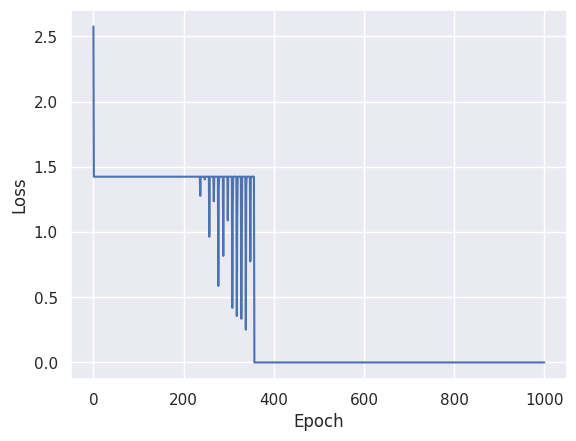

In [ ]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
def predict(X, w, b):
    return np.array([neuron(w, b, x) for x in X])

y_hat = predict(X, w, b)
y_hat == y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
class SingleNeuron:
    def __init__(self, input_size, activation_function, loss_function):
        self.w = np.random.randn(input_size)
        self.b = np.random.randn()
        self.activation_function = activation_function
        self.loss_function = loss_function

    def preactivation(self, x):
        return np.dot(self.w, x) + self.b

    def post_activation(self, z):
        return self.activation_function(z)

    def __call__(self, x):
        return self.post_activation(self.preactivation(x))

    def train(self, X, y, learning_rate = .5, epochs = 100):
        losses = []
        losses.append(self.loss_function(X, y, self.w, self.b))
        for epoch in range(epochs):
            for x, y_true in zip(X, y):
                self.w = self.w - learning_rate *(self(x) - y_true) * x
                self.b = self.b - learning_rate *(self(x) - y_true)
            losses.append(self.loss_function(X, y, self.w, self.b))
        return losses

In [ ]:
node = SingleNeuron(2, sign, loss)
node.train(X, y, epochs = 1_000)

[2.575916230366492,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.4240837696335078,
 1.42408376963

In [ ]:
node(node(X[0]))

array([-1.,  1.])

In [ ]:
node(X[65])

1.0

In [ ]:
y[65]

1

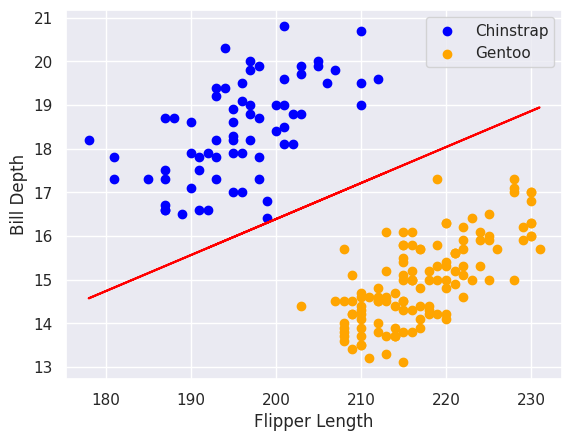

In [ ]:
def line(x):
    return -w[0] / w[1] * x - b / w[1]


plt.scatter(X[:68, 0], X[:68, 1], c="blue", label="Chinstrap")
plt.scatter(X[68:, 0], X[68:, 1], c="orange", label="Gentoo")   #go back and try chinstrap & Gentoo?
plt.xlabel("Flipper Length")
plt.ylabel("Bill Depth")
plt.legend()
plt.plot(X[:, 0], line(X[:, 0]), color="red")
plt.show()

write up with text cells using prof repo as inspiration, then email it to him for suggestions/improvement hints to be used in final grade project